<h1>The Battle of Neighborhoods<h/1>

In [52]:
#import packages
import numpy as np # library to handle data in a vectorized manner
from bs4 import BeautifulSoup
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<h3>scrapping data from wikipedia to derive the Malaysia postcode by states data</h3>

In [53]:
#scrapping using BeautifulSoup
source = requests.get('https://ms.wikipedia.org/wiki/Senarai_poskod_di_Malaysia#Kuala_Lumpur').text
soup = BeautifulSoup(source, 'lxml')
#article = soup.find('a', href='/wiki/States_of_Malaysia', title='States of Malaysia')
#article = soup.find_all('table', class_='wikitable')
article = soup.find_all('table', class_='wikitable')

#output the data into 2 separate lists    
postcode_list=[]
state_list=[]
i=1
#for tag in soup.find_all('td'):
for tag in soup.find_all('td'):
    if i == 1:
        posttemp = tag.text
        posttemp = posttemp.replace('\n','')
        postcode_list.append(posttemp)
    if i == 2:
        statetemp = tag.text
        statetemp = statetemp.replace('\n','')
        state_list.append(statetemp)
    i = i+1
    if i==3:
        i=1
        


<h3>create a dataframe to keep the postcode data for Kuala Lumpur</h3>

In [54]:
# Creating a dataframe object from listoftuples
mydict = {'PostalCode': postcode_list, 'State': state_list}
dfObjKL = pd.DataFrame({ key:pd.Series(value) for key, value in mydict.items() })

#Only process the cells that have State = 'Kuala Lumpur'
indexNames = dfObjKL[ dfObjKL['State'] != 'Kuala Lumpur' ].index
 
# Delete these row indexes from dataFrame
dfObjKL.drop(indexNames , inplace=True)

#reset index start from 0
dfObjKL = dfObjKL.reset_index(drop=True)

#convert PostalCode to integer for later use
dfObjKL['PostalCode']=dfObjKL['PostalCode'].astype(int)

#dict_df
dfObjKL

,PostalCode,State
0,50000,Kuala Lumpur
1,50050,Kuala Lumpur
2,50100,Kuala Lumpur
3,50150,Kuala Lumpur
4,50200,Kuala Lumpur
5,50250,Kuala Lumpur
6,50300,Kuala Lumpur
7,50350,Kuala Lumpur
8,50400,Kuala Lumpur
9,50450,Kuala Lumpur


<h3>create a dataframe to keep the postcode data for Pulau Pinang</h3>

<h5>Note: Pulau Pinang = Penang</h5>

In [55]:
# Creating a dataframe object from listoftuples
mydict = {'PostalCode': postcode_list, 'State': state_list}
dfObjPenang = pd.DataFrame({ key:pd.Series(value) for key, value in mydict.items() })

#Only process the cells that have State = 'Pulau Pinang'
indexNames = dfObjPenang[ dfObjPenang['State'] != 'Pulau Pinang' ].index
 
# Delete these row indexes from dataFrame
dfObjPenang.drop(indexNames , inplace=True)

#reset index start from 0
dfObjPenang = dfObjPenang.reset_index(drop=True)

#convert PostalCode to integer for later use
dfObjPenang['PostalCode']=dfObjPenang['PostalCode'].astype(int)

dfObjPenang

,PostalCode,State
0,10000,Pulau Pinang
1,10050,Pulau Pinang
2,10100,Pulau Pinang
3,10150,Pulau Pinang
4,10200,Pulau Pinang
5,10250,Pulau Pinang
6,10300,Pulau Pinang
7,10350,Pulau Pinang
8,10400,Pulau Pinang
9,10450,Pulau Pinang


In [56]:
#read the Malaysia polulation data from csv into dataframe
#Source: National Census 2010,[1] Department of Statistics Malaysia
dfPopulation = pd.read_csv("Malaysia_population_2010.csv", encoding='windows-1252') 

# Preview the first 16 lines of the loaded data 
dfPopulation.head(16)

,State,Population,Area (km2),Pop density,Urban pop (%),Bumiputra (%),Chinese (%),Indian (%)
0,Johor,"3,348,283","19,210",174,71.9,58.9,33.6,7.1
1,Kedah,"1,890,098","9,500",199,64.6,77.9,13.6,7.3
2,Kelantan,"1,459,994","15,099",97,42.4,95.7,3.4,0.3
3,Malacca,"788,706","1,664",470,86.5,66.9,26.4,6.2
4,Negeri Sembilan,"997,071","6,686",150,66.5,61.3,23.2,15.2
5,Pahang,"1,443,365","36,137",40,50.5,79.0,16.2,4.4
6,Penang,"1,520,143","1,048","1,500",90.8,43.6,45.6,10.4
7,Perak,"2,258,428","21,035",110,69.7,57.0,30.4,12.2
8,Perlis,"227,025",821,280,51.4,88.4,8.0,1.2
9,Selangor,"5,411,324","8,104",670,91.4,57.1,28.6,13.5


<h2>Bar chart to show the Chinese polulation by State</h2>

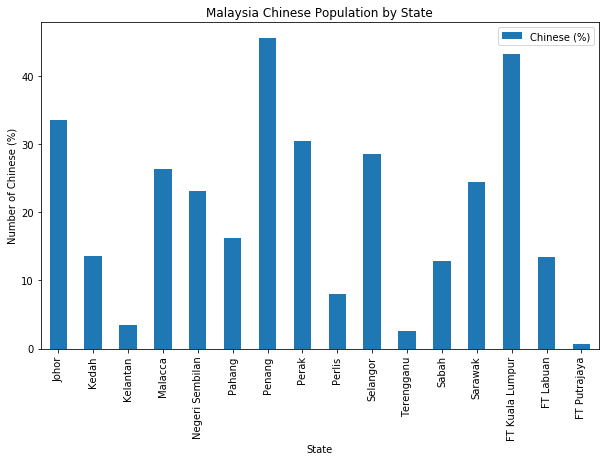

In [57]:
#retrieve State and Chinese(%) from dataframe
df_C = dfPopulation[['State','Chinese (%)']]

#set new index using State
df_C.set_index('State',inplace=True)

df_C.plot(kind='bar', figsize=(10, 6))
plt.xlabel('State') # add to x-label to the plot
plt.ylabel('Number of Chinese (%)') # add y-label to the plot
plt.title('Malaysia Chinese Population by State') # add title to the plot

plt.show()


In [58]:
#read the Malaysia geolocation data from csv
#Source: https://www.aggdata.com/
dfGeo = pd.read_csv("my_postal_codes.csv", encoding='windows-1252') 
dfGeo.rename(columns={'Postal Code':'PostalCode'}, 
                 inplace=True)

#convert PostalCode to integer for merging dataframe by PostalCode
dfGeo['PostalCode']=dfGeo['PostalCode'].astype(int)

# Preview the first 5 lines of the loaded data 
dfGeo.head()

,PostalCode,State Abbreviation,Latitude,Longitude
0,79000,JHR,1.5014,103.6439
1,79100,JHR,1.4835,103.6341
2,79150,JHR,1.4968,103.6524
3,79200,JHR,1.4836,103.6364
4,79250,JHR,1.5034,103.6522


<h3>to get the latitude and longitude by PostalCode for Kuala Lumpur</h3>

In [59]:
#merge the 2 dataframe into one
dfKL_merge = pd.merge(dfObjKL, dfGeo, on='PostalCode')
dfKL_merge

,PostalCode,State,State Abbreviation,Latitude,Longitude
0,50000,Kuala Lumpur,KUL,3.1433,101.6955
1,50050,Kuala Lumpur,KUL,3.1451,101.6945
2,50100,Kuala Lumpur,KUL,3.1513,101.6947
3,50150,Kuala Lumpur,KUL,3.1406,101.6955
4,50200,Kuala Lumpur,KUL,3.1447,101.7007
5,50250,Kuala Lumpur,KUL,3.1447,101.6951
6,50300,Kuala Lumpur,KUL,3.1841,101.6911
7,50350,Kuala Lumpur,KUL,3.1512,101.6956
8,50400,Kuala Lumpur,KUL,3.1490,101.6970
9,50450,Kuala Lumpur,KUL,3.1512,101.7091


<h3>to get the latitude and longitude by PostalCode for Penang</h3>

In [60]:
#merge the 2 dataframe into one
dfPenang_merge = pd.merge(dfObjPenang, dfGeo, on='PostalCode')
dfPenang_merge

,PostalCode,State,State Abbreviation,Latitude,Longitude
0,10000,Pulau Pinang,PNG,5.4166,100.3305
1,10050,Pulau Pinang,PNG,5.4195,100.3278
2,10100,Pulau Pinang,PNG,5.4166,100.3326
3,10150,Pulau Pinang,PNG,5.4067,100.3259
4,10200,Pulau Pinang,PNG,5.4208,100.3361
5,10250,Pulau Pinang,PNG,5.4265,100.3205
6,10300,Pulau Pinang,PNG,5.4111,100.3334
7,10350,Pulau Pinang,PNG,5.4309,100.3138
8,10400,Pulau Pinang,PNG,5.4172,100.3233
9,10450,Pulau Pinang,PNG,5.4182,100.3068


<h3>Use geopy library to get the latitude and longitude values of Kuala Lumpur</h3>

In [61]:
#Use geopy library to get the latitude and longitude values of Kuala Lumpur
address = 'Kuala Lumpur'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kuala Lumpur are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Kuala Lumpur are 3.1516636, 101.6943028.


<h3>Create map of Kuala Lumpur</h3>

In [62]:
# create map of Kuala Lumpur using latitude and longitude values
map_KL = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, stat in zip(dfKL_merge['Latitude'], dfKL_merge['Longitude'], dfKL_merge['State']):    
    label = '{}'.format(dfKL_merge['State'])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_KL)  
    
map_KL

<h3>Foursquare</h3>

In [63]:
#get the top 100 venues within a radius of 500 meters

#foursquare credential and version
CLIENT_ID = 'MJNVZHZ53CZ4KRPYKKPHEBARUEDUGOGFJTSUOOT4VVLBUZZN' 
CLIENT_SECRET = 'APM4KUAOYTIEVLILDOVWR5C4CMVTIF2KIJZ1GAKXGUXKEHNV' 
VERSION = '20180605' # Foursquare API version

# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

In [64]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [65]:
#create function to get nearby
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Post Code', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
        
        

In [66]:
#run the above function on each neighborhood and create a new dataframe called KL_venues
KL_venues = getNearbyVenues(names=dfKL_merge['PostalCode'],
                                 latitudes=dfKL_merge['Latitude'],
                                 longitudes=dfKL_merge['Longitude']
                                  )

50000
50050
50100
50150
50200
50250
50300
50350
50400
50450
50460
50470
50480
50490
51000
52000
52100
52200
53000
53100
53200
53300
54000
54100
54200
55000
55100
55200
55300
56000
56100
57000
57100
58000
58100
58200
59000
59100
59200
60000


In [67]:
#view the 20 records
KL_venues.head(20)

,Post Code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,50000,3.1433,101.6955,Shuang Xi 雙喜,3.142853,101.696465,Speakeasy
1,50000,3.1433,101.6955,茨厂街驰名罗汉果龙眼冰糖炖冬瓜 (Air Mata Kucing),3.144449,101.697553,Food Truck
2,50000,3.1433,101.6955,Each A Cup,3.145321,101.695451,Dessert Shop
3,50000,3.1433,101.6955,Weng Hoa Flower Boutique Sdn. Bhd.,3.144506,101.696088,Flower Shop
4,50000,3.1433,101.6955,Shin Kee Beef Noodles,3.145058,101.696877,Noodle House
5,50000,3.1433,101.6955,Aku Cafe & Gallery,3.141877,101.697148,Café
6,50000,3.1433,101.6955,裔记 茨厂街猪肠粉,3.144420,101.697680,Asian Restaurant
7,50000,3.1433,101.6955,Family Mart,3.145195,101.698606,Convenience Store
8,50000,3.1433,101.6955,Urbanscapes House,3.146803,101.696028,Exhibit
9,50000,3.1433,101.6955,四眼仔烧鸭 Sze Ngan Chye Roasted Duck,3.144174,101.697732,Asian Restaurant


<h3>sort venues = restaurant</h3>

In [68]:
KL_venues = KL_venues[KL_venues['Venue Category'].str.contains('Restaurant')]
KL_venues

,Post Code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
6,50000,3.1433,101.6955,裔记 茨厂街猪肠粉,3.144420,101.697680,Asian Restaurant
9,50000,3.1433,101.6955,四眼仔烧鸭 Sze Ngan Chye Roasted Duck,3.144174,101.697732,Asian Restaurant
10,50000,3.1433,101.6955,阿世饭店 Restaurant Ah Sai,3.144030,101.698174,Restaurant
12,50000,3.1433,101.6955,"Ali, Muthu & Ah Hock",3.141224,101.697286,Malay Restaurant
15,50000,3.1433,101.6955,汉记靓粥 since 1949,3.144399,101.697785,Chinese Restaurant
17,50000,3.1433,101.6955,亚世饭店,3.143978,101.698156,Malay Restaurant
18,50000,3.1433,101.6955,Geographer Café Kuala Lumpur,3.146514,101.696579,Restaurant
30,50000,3.1433,101.6955,Restoran West Lake 西湖饭店,3.143007,101.698600,Chinese Restaurant
32,50000,3.1433,101.6955,Restaurant Nasi Ayam Kam Kee,3.143107,101.698679,Asian Restaurant
36,50000,3.1433,101.6955,茨场街 Asam Laksa,3.143951,101.697711,Chinese Restaurant


In [69]:
#to get total venues of Kuala Lumpur
print('{} Kuala Lumpur restaurant were returned by Foursquare.'.format(KL_venues.shape[0]))

517 Kuala Lumpur restaurant were returned by Foursquare.


In [70]:
#check how many venues were returned for each Post Code, sort by descending order
KL_venues.groupby('Post Code').count().sort_values(by='Venue Category', ascending=False)

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Post Code,,,,,,
50400,34,34,34,34,34,34
55100,34,34,34,34,34,34
50350,30,30,30,30,30,30
50100,28,28,28,28,28,28
50450,26,26,26,26,26,26
50250,24,24,24,24,24,24
50000,23,23,23,23,23,23
59100,23,23,23,23,23,23
50050,22,22,22,22,22,22


<h3>Analyze each Post Code of Kuala Lumpur</h3>

In [71]:
# one hot encoding
KL_onehot = pd.get_dummies(KL_venues[['Venue Category']], prefix="", prefix_sep="")

# add postalcode column back to dataframe
KL_onehot['Post Code'] = KL_venues['Post Code'] 

# move PostalCode column to the first column
fixed_columns = [KL_onehot.columns[-1]] + list(KL_onehot.columns[:-1])
KL_onehot = KL_onehot[fixed_columns]

KL_onehot.head()

,Post Code,African Restaurant,Asian Restaurant,Australian Restaurant,Cantonese Restaurant,Chettinad Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Hakka Restaurant,Halal Restaurant,Hawaiian Restaurant,Hunan Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mamak Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Multicuisine Indian Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,South Indian Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yakitori Restaurant
6,50000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,50000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,50000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
12,50000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,50000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h3>group rows by Post Code and by taking the mean of the frequency of occurrence of each category</h3>

In [72]:
KL_grouped = KL_onehot.groupby('Post Code').mean().reset_index()
KL_grouped

,Post Code,African Restaurant,Asian Restaurant,Australian Restaurant,Cantonese Restaurant,Chettinad Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Hakka Restaurant,Halal Restaurant,Hawaiian Restaurant,Hunan Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mamak Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Multicuisine Indian Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,South Indian Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yakitori Restaurant
0,50000,0.000000,0.260870,0.000,0.000000,0.000000,0.304348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.173913,0.000000,0.043478,0.000000,0.000000,0.000000,0.086957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.043478,0.000000,0.000000,0.000000
1,50050,0.000000,0.318182,0.000,0.000000,0.000000,0.227273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.227273,0.000000,0.045455,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.045455,0.000000,0.000000,0.000000
2,50100,0.000000,0.035714,0.000,0.000000,0.035714,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.464286,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.214286,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.035714,0.000000,0.000000
3,50150,0.000000,0.200000,0.000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.050000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,50200,0.000000,0.250000,0.000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5,50250,0.000000,0.291667,0.000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.208333,0.000000,0.041667,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.041667,0.000000,0.000000,0.000000
6,50300,0.000000,0.111111,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.111111,0.000000,0.000000,0.000000
7,50350,0.000000,0.066667,0.000,0.000000,0.033333,0.066667,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.433333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.033333,0.000000,0.000000
8,50400,0.000000,0.117647,0.000,0.000000,0.029412,0.088235,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.382353,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.117647,0

In [73]:
#function to sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [74]:
#create new dataframe to display top 10 venues in each Post Code
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Post Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Post Code'] = KL_grouped['Post Code']

for ind in np.arange(KL_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(KL_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Post Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,50000,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant
1,50050,Asian Restaurant,Malay Restaurant,Chinese Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Yakitori Restaurant,French Restaurant,Hunan Restaurant
2,50100,Indian Restaurant,Malay Restaurant,South Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Kebab Restaurant,Chettinad Restaurant,Chinese Restaurant,Yakitori Restaurant
3,50150,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Halal Restaurant,Indian Restaurant,Middle Eastern Restaurant,Yakitori Restaurant,Indonesian Restaurant,Hunan Restaurant
4,50200,Restaurant,Asian Restaurant,Chinese Restaurant,Malay Restaurant,Halal Restaurant,Yakitori Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hawaiian Restaurant


<h3>Clustering Neighborhoods using un-supervised K-means clustering</h3>

In [75]:
# set number of clusters
kclusters = 3

KL_grouped_clustering = KL_grouped.drop('Post Code', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(KL_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 1, 2, 2, 2, 1, 1, 1, 1], dtype=int32)

In [76]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#KL_merged = KL_data

# merge KL_grouped with KL_data to add latitude/longitude for each neighborhood
KL_venues = KL_venues.join(neighborhoods_venues_sorted.set_index('Post Code'), on='Post Code')

KL_venues.head() # check the last columns!

,Post Code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,50000,3.1433,101.6955,裔记 茨厂街猪肠粉,3.144420,101.697680,Asian Restaurant,2,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant
9,50000,3.1433,101.6955,四眼仔烧鸭 Sze Ngan Chye Roasted Duck,3.144174,101.697732,Asian Restaurant,2,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant
10,50000,3.1433,101.6955,阿世饭店 Restaurant Ah Sai,3.144030,101.698174,Restaurant,2,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant
12,50000,3.1433,101.6955,"Ali, Muthu & Ah Hock",3.141224,101.697286,Malay Restaurant,2,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant
15,50000,3.1433,101.6955,汉记靓粥 since 1949,3.144399,101.697785,Chinese Restaurant,2,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant


<h3>Examine Clusters</h3>

<h3>Cluster 1</h3>

In [77]:
KL_venues.loc[KL_venues['Cluster Labels'] == 0, KL_venues.columns[[1] + list(range(5, KL_venues.shape[1]))]]

,Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
903,3.1911,101.696606,Malay Restaurant,0,Malay Restaurant,Asian Restaurant,Thai Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant
904,3.1911,101.696145,Thai Restaurant,0,Malay Restaurant,Asian Restaurant,Thai Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant
905,3.1911,101.691290,Malay Restaurant,0,Malay Restaurant,Asian Restaurant,Thai Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant
906,3.1911,101.695019,Asian Restaurant,0,Malay Restaurant,Asian Restaurant,Thai Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant
907,3.1911,101.694076,Malay Restaurant,0,Malay Restaurant,Asian Restaurant,Thai Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant
911,3.1911,101.693960,Malay Restaurant,0,Malay Restaurant,Asian Restaurant,Thai Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant
914,3.1911,101.691842,Middle Eastern Restaurant,0,Malay Restaurant,Asian Restaurant,Thai Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant
917,3.1911,101.696591,Asian Restaurant,0,Malay Restaurant,Asian Restaurant,Thai Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant
921,3.1911,101.696809,Asian Restaurant,0,Malay Restaurant,Asian Restaurant,Thai Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant
923,3.1911,101.696920,Malay Restaurant,0,Malay Restaurant,Asian Restaurant,Thai Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant


<h3>Cluster 2</h3>

In [78]:
KL_venues.loc[KL_venues['Cluster Labels'] == 1, KL_venues.columns[[1] + list(range(5, KL_venues.shape[1]))]]

,Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
171,3.1513,101.696074,Indian Restaurant,1,Indian Restaurant,Malay Restaurant,South Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Kebab Restaurant,Chettinad Restaurant,Chinese Restaurant,Yakitori Restaurant
172,3.1513,101.694701,Restaurant,1,Indian Restaurant,Malay Restaurant,South Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Kebab Restaurant,Chettinad Restaurant,Chinese Restaurant,Yakitori Restaurant
173,3.1513,101.694922,Asian Restaurant,1,Indian Restaurant,Malay Restaurant,South Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Kebab Restaurant,Chettinad Restaurant,Chinese Restaurant,Yakitori Restaurant
174,3.1513,101.696364,Kebab Restaurant,1,Indian Restaurant,Malay Restaurant,South Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Kebab Restaurant,Chettinad Restaurant,Chinese Restaurant,Yakitori Restaurant
178,3.1513,101.697763,Chettinad Restaurant,1,Indian Restaurant,Malay Restaurant,South Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Kebab Restaurant,Chettinad Restaurant,Chinese Restaurant,Yakitori Restaurant
181,3.1513,101.697475,Indian Restaurant,1,Indian Restaurant,Malay Restaurant,South Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Kebab Restaurant,Chettinad Restaurant,Chinese Restaurant,Yakitori Restaurant
182,3.1513,101.698156,South Indian Restaurant,1,Indian Restaurant,Malay Restaurant,South Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Kebab Restaurant,Chettinad Restaurant,Chinese Restaurant,Yakitori Restaurant
184,3.1513,101.697446,Indian Restaurant,1,Indian Restaurant,Malay Restaurant,South Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Kebab Restaurant,Chettinad Restaurant,Chinese Restaurant,Yakitori Restaurant
189,3.1513,101.697254,Indian Restaurant,1,Indian Restaurant,Malay Restaurant,South Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Kebab Restaurant,Chettinad Restaurant,Chinese Restaurant,Yakitori Restaurant
192,3.1513,101.697300,Indian Restaurant,1,Indian Restaurant,Malay Restaurant,South Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Kebab Restaurant,Chettinad Restaurant,Chinese Restaurant,Yakitori Restaurant


<h3>Cluster 3</h3>

In [79]:
KL_venues.loc[KL_venues['Cluster Labels'] == 2, KL_venues.columns[[1] + list(range(5, KL_venues.shape[1]))]]

,Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,3.1433,101.697680,Asian Restaurant,2,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant
9,3.1433,101.697732,Asian Restaurant,2,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant
10,3.1433,101.698174,Restaurant,2,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant
12,3.1433,101.697286,Malay Restaurant,2,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant
15,3.1433,101.697785,Chinese Restaurant,2,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant
17,3.1433,101.698156,Malay Restaurant,2,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant
18,3.1433,101.696579,Restaurant,2,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant
30,3.1433,101.698600,Chinese Restaurant,2,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant
32,3.1433,101.698679,Asian Restaurant,2,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant
36,3.1433,101.697711,Chinese Restaurant,2,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Halal Restaurant,Yakitori Restaurant,French Restaurant


<h2>Start Analyze Penang</h2>

<h3>Use geopy library to get the latitude and longitude values of Penang</h3>

In [80]:
#Use geopy library to get the latitude and longitude values of Kuala Lumpur
address = 'Pulau Pinang'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Penang are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Penang are 5.3787924, 100.250172.


<h3>Create map of Penang</h3>

In [81]:
# create map of Penang using latitude and longitude values
map_Penang = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, stat in zip(dfPenang_merge['Latitude'], dfPenang_merge['Longitude'], dfPenang_merge['State']):    
    label = '{}'.format(dfPenang_merge['State'])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Penang)  
    
map_Penang

In [82]:
#run the above function on each neighborhood and create a new dataframe called Penang_venues
Penang_venues = getNearbyVenues(names=dfPenang_merge['PostalCode'],
                                 latitudes=dfPenang_merge['Latitude'],
                                 longitudes=dfPenang_merge['Longitude']
                                  )

10000
10050
10100
10150
10200
10250
10300
10350
10400
10450
10460
10470
11050
11060
11400


In [83]:
#view the 20 records
Penang_venues.head(20)

,Post Code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,10000,5.4166,100.3305,Rabbit X Hold Up,5.416611,100.331770,Café
1,10000,5.4166,100.3305,Le Dream Boutique Hotel,5.415522,100.332648,Hotel
2,10000,5.4166,100.3305,Penang Road Famous Teochew Chendul (Tan),5.416927,100.330743,Dessert Shop
3,10000,5.4166,100.3305,La Vie,5.415354,100.332793,American Restaurant
4,10000,5.4166,100.3305,Chok Kee Porridge Cafe (粥記咖啡店)(豬腸粥 皮蛋粥 艇仔粥),5.416917,100.331771,Chinese Restaurant
5,10000,5.4166,100.3305,Ming Xiang Tai (名香泰）,5.417178,100.330617,Bakery
6,10000,5.4166,100.3305,Jeruk Madu Pak Ali,5.418054,100.331198,Dessert Shop
7,10000,5.4166,100.3305,Bee Hwa Cafe,5.418931,100.331046,Halal Restaurant
8,10000,5.4166,100.3305,汕頭街阿海現煮粿條湯,5.416487,100.332563,Food Truck
9,10000,5.4166,100.3305,L Kitchen 李月香 粥面饭,5.418209,100.333146,Chinese Restaurant


<h3>sort venues = restaurant</h3>

In [84]:
Penang_venues = Penang_venues[Penang_venues['Venue Category'].str.contains('Restaurant')]
Penang_venues

,Post Code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,10000,5.4166,100.3305,La Vie,5.415354,100.332793,American Restaurant
4,10000,5.4166,100.3305,Chok Kee Porridge Cafe (粥記咖啡店)(豬腸粥 皮蛋粥 艇仔粥),5.416917,100.331771,Chinese Restaurant
7,10000,5.4166,100.3305,Bee Hwa Cafe,5.418931,100.331046,Halal Restaurant
9,10000,5.4166,100.3305,L Kitchen 李月香 粥面饭,5.418209,100.333146,Chinese Restaurant
15,10000,5.4166,100.3305,Bock Garden Meatless Cafe (家之園咖啡素食餐廳),5.419537,100.329194,Vegetarian / Vegan Restaurant
18,10000,5.4166,100.3305,Hameediyah Restaurant,5.418519,100.332556,Indian Restaurant
21,10000,5.4166,100.3305,Hon Kei Food Corner (漢記小食店),5.419087,100.332572,Chinese Restaurant
23,10000,5.4166,100.3305,Nana Tomyam,5.419506,100.330063,Thai Restaurant
26,10000,5.4166,100.3305,Furqan Thai Food Restaurant,5.420012,100.331574,Thai Restaurant
32,10000,5.4166,100.3305,Luk Yea Yan Vegetarian Restaurant (鹿野苑素食馆),5.417196,100.327027,Vegetarian / Vegan Restaurant


In [85]:
#to get total venues of Penang
print('{} Penang restaurant were returned by Foursquare.'.format(Penang_venues.shape[0]))

227 Penang restaurant were returned by Foursquare.


In [86]:
#check how many venues were returned for each Post Code, sort by descending order
Penang_venues.groupby('Post Code').count().sort_values(by='Venue Category', ascending=False)

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Post Code,,,,,,
10050,35,35,35,35,35,35
10350,35,35,35,35,35,35
10200,33,33,33,33,33,33
10100,26,26,26,26,26,26
10470,19,19,19,19,19,19
10000,17,17,17,17,17,17
10460,16,16,16,16,16,16
11400,11,11,11,11,11,11
10400,9,9,9,9,9,9


<h3>Analyze each post code of Penang</h3>

In [87]:
# one hot encoding
Penang_onehot = pd.get_dummies(Penang_venues[['Venue Category']], prefix="", prefix_sep="")

# add postalcode column back to dataframe
Penang_onehot['Post Code'] = Penang_venues['Post Code'] 

# move PostalCode column to the first column
fixed_columns = [Penang_onehot.columns[-1]] + list(Penang_onehot.columns[:-1])
Penang_onehot = Penang_onehot[fixed_columns]

Penang_onehot.head()

,Post Code,American Restaurant,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant,English Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Korean Restaurant,Malay Restaurant,Mamak Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Swiss Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
3,10000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,10000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<h3>group rows by Post Code and by taking the mean of the frequency of occurrence of each category</h3>

In [88]:
Penang_grouped = Penang_onehot.groupby('Post Code').mean().reset_index()
Penang_grouped

,Post Code,American Restaurant,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant,English Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Korean Restaurant,Malay Restaurant,Mamak Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Swiss Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,10000,0.058824,0.000000,0.235294,0.058824,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.058824,0.058824,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.117647,0.176471,0.000000
1,10050,0.000000,0.142857,0.228571,0.000000,0.000000,0.000000,0.000000,0.057143,0.028571,0.000000,0.028571,0.000000,0.000000,0.028571,0.000000,0.057143,0.057143,0.000000,0.000000,0.028571,0.000000,0.000000,0.057143,0.000000,0.000000,0.085714,0.171429,0.028571
2,10100,0.038462,0.000000,0.384615,0.000000,0.000000,0.000000,0.000000,0.038462,0.038462,0.000000,0.076923,0.038462,0.000000,0.038462,0.000000,0.076923,0.000000,0.000000,0.038462,0.038462,0.000000,0.038462,0.000000,0.000000,0.000000,0.115385,0.038462,0.000000
3,10150,0.000000,0.200000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,10200,0.030303,0.060606,0.272727,0.000000,0.000000,0.000000,0.030303,0.030303,0.060606,0.000000,0.090909,0.030303,0.000000,0.060606,0.000000,0.030303,0.030303,0.030303,0.030303,0.030303,0.000000,0.151515,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000
5,10250,0.000000,0.000000,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000
6,10300,0.125000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0.000000,0.250000,0.000000
7,10350,0.000000,0.142857,0.142857,0.000000,0.028571,0.000000,0.000000,0.028571,0.028571,0.028571,0.000000,0.028571,0.000000,0.028571,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.028571,0.057143,0.142857,0.028571,0.000000,0.057143,0.085714,0.000000
8,10400,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.111111,0.222222,0.000000
9,10450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [89]:
#create new dataframe to display top 10 venues in each Post Code
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Post Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Post Code'] = Penang_grouped['Post Code']

for ind in np.arange(Penang_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Penang_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Post Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10000,Chinese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,American Restaurant,Italian Restaurant,Dim Sum Restaurant,Modern European Restaurant,Hainan Restaurant,Halal Restaurant,Malay Restaurant
1,10050,Chinese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Thai Restaurant,Mamak Restaurant,Seafood Restaurant,Hainan Restaurant,Malay Restaurant,Vietnamese Restaurant,Halal Restaurant
2,10100,Chinese Restaurant,Thai Restaurant,Malay Restaurant,Indian Restaurant,Japanese Restaurant,Hainan Restaurant,Halal Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,American Restaurant
3,10150,Chinese Restaurant,Asian Restaurant,Mamak Restaurant,Vietnamese Restaurant,Japanese Curry Restaurant,Dim Sum Restaurant,English Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant
4,10200,Chinese Restaurant,Restaurant,Indian Restaurant,Japanese Restaurant,Asian Restaurant,Halal Restaurant,Mamak Restaurant,French Restaurant,Hainan Restaurant,Italian Restaurant
